## Programming Exercise 2: Logistic Regression

The following notebook contains exercise solution for logistic regression assignment.

In [1]:
# Standard imports. Importing seaborn for styling.
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn; seaborn.set_style('whitegrid')

### 1 Logistic Regression
The task for this exercise is to build a logistic regression model that estimates an applicant's probability of admission based on the scores from two exams.

#### 1.1 Visualizing the data
We start by importing and plotting the given data:

In [2]:
# Loading the data. The first two columns contain the exam scores and the third column contains the label.
data = np.loadtxt('data/ex2data1.txt', delimiter=',')
X, y = data[:,:2], data[:,2]

# Viewing the imported values (first 5 rows)
X[:5], y[:5]

(array([[ 34.62365962,  78.02469282],
        [ 30.28671077,  43.89499752],
        [ 35.84740877,  72.90219803],
        [ 60.18259939,  86.3085521 ],
        [ 79.03273605,  75.34437644]]), array([ 0.,  0.,  0.,  1.,  1.]))

In [3]:
# Creating plotData method to display the figure where the axes are the two exam scores.
def plotData(x, y, xlabel, ylabel, labelPos, labelNeg):
    
    # Separating positive and negative scores (in this case 1 and 0 values):
    pos = y==1
    neg = y==0

    # Scatter plotting the data, filtering them according the pos/neg values:
    plt.scatter(x[pos, 0], x[pos, 1], s=30, c='darkblue', marker='+', label=labelPos)
    plt.scatter(x[neg, 0], x[neg, 1], s=30, c='yellow', marker='o', edgecolors='b', label=labelNeg)

    # Labels and limits:
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xlim(x[:, 0].min(), x[:, 0].max())
    plt.ylim(x[:, 1].min(), x[:, 1].max())

    # Legend:
    pst = plt.legend(loc='upper right', frameon=True)
    pst.get_frame().set_edgecolor('k');

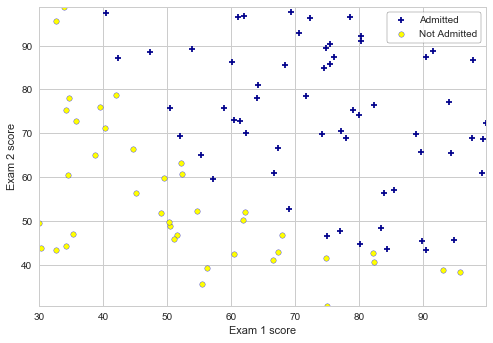

In [4]:
# Plotting the initial figure:
plotData(X, y, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not Admitted')

#### 1.2 Implementation
#### 1.2.1 Warmup exercise: sigmoid function


Logistic regression hypothesis is defined as
$h_\theta(x) = g(\theta^{T}x)$,
where g is the sigmoid function. The sigmoid function is defined as
$
g(z) = \frac{1}{1 +  e^{-z}}
$

In [5]:
# While using (return 1 / (1 + np.exp(-z))), per the sigmoid function, I was getting an overflow warning.
# As a solution warning can be ignored, or the dtype can be changed to not cause the error/warning.
# I used expit method from scipy to eliminate this issue.
from scipy.special import expit

# Defining sigmoid function:
def sigmoid(z):
    # return 1 / (1 + np.exp(-z))
    return expit(z)

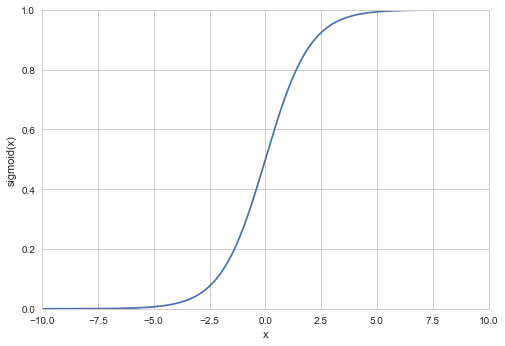

In [6]:
# Calculating,
x_val = np.linspace(-10, 10, 10000)

# and plotting the calculated sigmoid function:
plt.plot(x_val, sigmoid(x_val))

# Labels and limits
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.xlim(x_val.min(), x_val.max())
plt.ylim(0, 1);

#### 1.2.2 Cost function and gradient

In this part of the assignment we will implement __cost function__ and __gradient methods__ for logistic regression.

In [7]:
# Defining costFunction method:
def costFunction(theta, X, y):
    # Number of training examples
    m = len(y)
    
    # eps = 1e-15  was taken from the solution by jellis18
    # https://github.com/jellis18/ML-Course-Solutions/blob/master/ex2/ex2.ipynb
    # It is tolerance for sigmoid function, fixes loss of precision error. 
    # Eliminates errors while using BFGS minimization in calculations using scipy.
    eps = 1e-15
    
    hThetaX = sigmoid(np.dot(X, theta))
    
    J = - (np.dot(y, np.log(hThetaX)) + np.dot((1 - y), np.log(1 - hThetaX + eps))) / m

    return J

In [8]:
# Defining gradientFunc:
def gradientFunc(theta, X, y):
    # Number of training examples
    m = len(y)
    
    hThetaX = sigmoid(np.dot(X, theta))
    
    gradient =  np.dot(X.T, (hThetaX - y)) / m 
    
    return gradient

We add an additional first column to X and set it to all ones. Also, we add theta and initialize the parameters to 0's.

In [9]:
X = np.hstack((np.ones((X.shape[0],1)), X))

theta = np.zeros(X.shape[1])
theta

array([ 0.,  0.,  0.])

We call __*costFunction*__ and __*gradientFunc*__ methods using the initial parameters of θ.

In [10]:
J = costFunction(theta, X, y)
gradient = gradientFunc(theta, X, y)

# We should see that the cost is about 0.693 per the exercise:
print("Cost: %0.3f"%(J))
print("Gradient: {0}".format(gradient))

Cost: 0.693
Gradient: [ -0.1        -12.00921659 -11.26284221]


#### 1.2.3 Learning parameters with scipy.optimize using .minimize

[scipy.optimize.minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) uses __[BFGS](https://en.wikipedia.org/wiki/Broyden%E2%80%93Fletcher%E2%80%93Goldfarb%E2%80%93Shanno_algorithm)__ as a default method for the function minimum calculations of unconstrained function, and finds the best parameters for θ (in our case logistic regression cost function). We are feeding objective (cost) function, x0 (initial guess), arguments, and Jacobian (gradient) of objective function to the algorithm.

In [11]:
# Importing minimize from scipy:
from scipy.optimize import minimize

# Finding the best parameters for θ, using the methods we created earlier:
# Expecting to see the cost around 0.203 per the assignment.
result = minimize(costFunction, theta, args=(X,y), method='BFGS', jac=gradientFunc, options={'maxiter' : 400, 'disp': True})
result

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 20
         Function evaluations: 27
         Gradient evaluations: 27


      fun: 0.20349770158946895
 hess_inv: array([[  3.22334551e+03,  -2.56933773e+01,  -2.62832733e+01],
       [ -2.56933773e+01,   2.18825098e-01,   1.96877313e-01],
       [ -2.62832733e+01,   1.96877313e-01,   2.29597943e-01]])
      jac: array([  1.70083910e-08,   2.07183236e-06,   1.59166614e-07])
  message: 'Optimization terminated successfully.'
     nfev: 27
      nit: 20
     njev: 27
   status: 0
  success: True
        x: array([-25.16133643,   0.20623177,   0.2014716 ])

#### 1.2.4 Evaluating logistic regression
After calculating the parameters, we can use the model to predict whether a particular student will be admitted. We are also calculating the decision boundary, and plotting the figure.

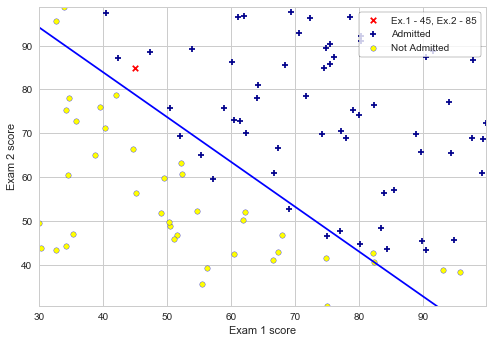

In [12]:
# Assigning the calculated θ to a variable
gradBFGS = result['x']

# Calculating x and y for the decision boundary
plot_x = np.array([np.min(X[:, 2])-1, np.max(X[:, 2])+1])

# From the decision boundary calculations x2 = (-1 / θ2) * (θ0 * x1 + θ0)
plot_y = (-1 / gradBFGS[2]) * (gradBFGS[1] * plot_x + gradBFGS[0])
plt.scatter(45, 85, s=30, c='r', marker='x', label='Ex.1 - 45, Ex.2 - 85')

# Plotting the data
plotData(X[:,1:], y, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not Admitted')
plt.plot(plot_x, plot_y, c='b');

In [13]:
# For a student with an Exam 1 score of 45 and an Exam 2 score of 85, you should expect
# to see an admission probability of 0.776
probability = sigmoid(np.dot(gradBFGS, np.array([1, 45.,85.])))

print("Exam scores: 45 and 85")
print("Probability of acceptance: %0.3f"%(probability))

Exam scores: 45 and 85
Probability of acceptance: 0.776


Next step is to calculate the training accuracy of the classifier by computing the percentage of examples it got correct:

In [14]:
def predict(theta, X):
    hThetaX = sigmoid(np.dot(X, theta))
    
    arr = []
    for h in hThetaX:
        if (h > 0.5):
            arr.append(1)
        else:
            arr.append(0)
        
    return np.array(arr)

# Prediction using calculated values of θ and given data set
p = predict(gradBFGS, X)

# Training accuracy
print('Training Accuracy of the classifier: {0}%'.format(np.sum(p==y) / p.size * 100))

Training Accuracy of the classifier: 89.0%


### 2 Regularized logistic regression

In this part of the exercise, regularized logistic regression is implemented to predict whether microchips from a fabrication plant passes quality assurance (QA).

#### 2.1 Visualizing the data

We start by importing the data and visualizing it, as in the previous part of the exercise.

In [15]:
data = np.loadtxt('data/ex2data2.txt', delimiter=',')
X, y = data[:,:2], data[:,2]

# Viewing the imported values (first 5 rows)
X[:5], y[:5]

(array([[ 0.051267,  0.69956 ],
        [-0.092742,  0.68494 ],
        [-0.21371 ,  0.69225 ],
        [-0.375   ,  0.50219 ],
        [-0.51325 ,  0.46564 ]]), array([ 1.,  1.,  1.,  1.,  1.]))

Plotting the imported data:

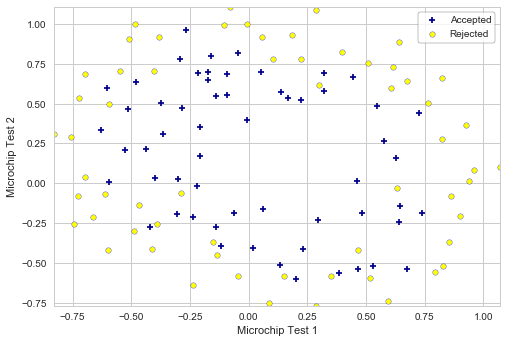

In [16]:
plotData(X, y, 'Microchip Test 1', 'Microchip Test 2', 'Accepted', 'Rejected')

#### 2.2 Feature mapping

One way to fit the data better is to create more features from each data point. To do that we can use __PolynomialFeatures__ from the __scikit-learn__ library to map the features into all polynomial terms of x1 and x2, up to the sixth power for the current exercise.

In [17]:
# Importing PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures

# Creating the model
poly = PolynomialFeatures(6)

# Transforming the data into the sixth power polynomial
X2 = poly.fit_transform(X)
X2.shape

(118, 28)

#### 2.3 Cost function and gradient

__Cost function__ and __gradient methods__ for regularized logistic regression.

In [18]:
# Defining regularized costFunction method:
def costFunctionR(theta, X, y, lam):
    # Number of training examples
    m = len(y)

    eps = 1e-15
    
    hThetaX = sigmoid(np.dot(X, theta))
    
    J = - (np.dot(y, np.log(hThetaX)) + np.dot((1 - y), np.log(1 - hThetaX + eps)) - 
           1/2 * lam * np.sum(np.square(theta[1:]))) / m

    return J

In [19]:
# Defining regularized gradientFunc:
def gradientFuncR(theta, X, y, lam):
    # Number of training examples
    m = len(y)
    
    hThetaX = sigmoid(np.dot(X, theta))
    
    # We're not regularizing the parameter θ0, replacing it with 0  
    thetaNoZeroReg = np.insert(theta[1:], 0, 0)
    
    gradient =  (np.dot(X.T, (hThetaX - y)) + lam * thetaNoZeroReg) / m 
    
    return gradient

In [20]:
# We add theta and initialize the parameters to 0's.
initial_theta = np.zeros(X2.shape[1])
initial_theta

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.])

We call __*costFunctionR*__ and __*gradientFuncR*__ methods using the initial parameters of θ.

In [21]:
J = costFunctionR(initial_theta, X2, y, 1)
gradient = gradientFuncR(initial_theta, X2, y, 1)

# We should see that the cost is about 0.693 per the exercise:
print("Cost: %0.3f"%(J))
print("Gradient: {0}".format(gradient))

Cost: 0.693
Gradient: [  8.47457627e-03   1.87880932e-02   7.77711864e-05   5.03446395e-02
   1.15013308e-02   3.76648474e-02   1.83559872e-02   7.32393391e-03
   8.19244468e-03   2.34764889e-02   3.93486234e-02   2.23923907e-03
   1.28600503e-02   3.09593720e-03   3.93028171e-02   1.99707467e-02
   4.32983232e-03   3.38643902e-03   5.83822078e-03   4.47629067e-03
   3.10079849e-02   3.10312442e-02   1.09740238e-03   6.31570797e-03
   4.08503006e-04   7.26504316e-03   1.37646175e-03   3.87936363e-02]


Calculating the parameters with __scipy.optimize__ using __*.minimize__, as in exercise part __1.2.3__.

In [22]:
result2 = minimize(costFunctionR, initial_theta, args=(X2, y, 1), method='BFGS', jac=gradientFuncR, 
                   options={'maxiter' : 400, 'disp': False})
result2['x']

array([ 1.27268739,  0.62557016,  1.1809665 , -2.01919822, -0.91761468,
       -1.43194199,  0.12375921, -0.36513086, -0.35703388, -0.17485805,
       -1.45843772, -0.05129676, -0.61603963, -0.2746414 , -1.19282569,
       -0.24270336, -0.20570022, -0.04499768, -0.27782709, -0.29525851,
       -0.45613294, -1.04377851,  0.02762813, -0.29265642,  0.01543393,
       -0.32759318, -0.14389199, -0.92460119])

#### 2.4 Plotting the decision boundary

The decision boundary function is provided with the exercise file. I am using the decision boundary calculations similar to the ones provided in scikit-learn [examples](http://scikit-learn.org/stable/auto_examples/index.html). In this case, we define the data used for meshgrid calculation, and then plot the contour plot using the meshgrid data.

In [23]:
def plotDecisionBoundary(X, y, title):
    # Plot the data
    plotData(X[:, 1:3], y, 'Microchip Test 1', 'Microchip Test 2', 'Accepted', 'Rejected')
    
    # Defining the data to use in the meshgrid calculation. Outputting xx and yy ndarrays
    x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    
    Z = sigmoid(poly.fit_transform(np.c_[xx.ravel(), yy.ravel()]).dot(result2['x']))
    Z = Z.reshape(xx.shape)
    
    # Plotting the contour plot
    plt.contour(xx, yy, Z, [0.5], linewidths=1, colors='g')
    plt.title(title)

#### 2.5 Optional (ungraded) exercises

In this part of exercise we will get to try different regularization parameters. We are observing overfitting with low λ values. With the larger λ values, we observe the decision boundary not following the data well, thus underfitting the data.

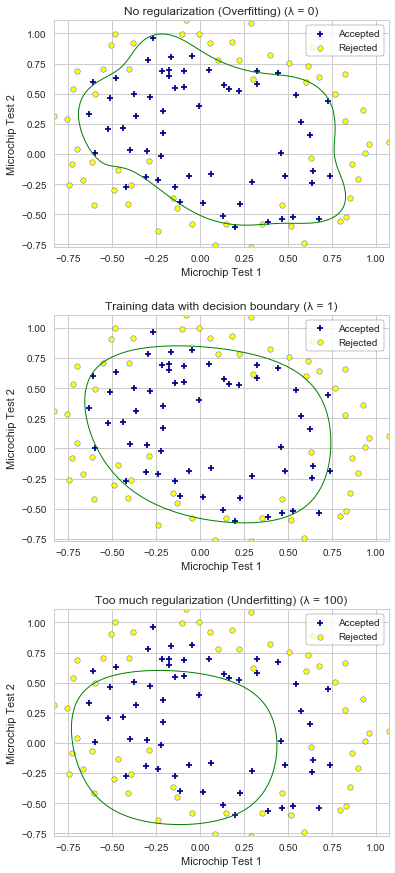

In [24]:
plt.figure(figsize=(6, 15))
plt.subplots_adjust(hspace=0.3)

# Creating 3 subplots using 3 different λ values
for i, lam in enumerate([0, 1, 100]):
    result2 = minimize(costFunctionR, initial_theta, args=(X2, y, lam), method='BFGS', jac=gradientFuncR, 
                       options={'maxiter' : 400, 'disp': False})
    
    if (lam == 0):
        title = 'No regularization (Overfitting) (λ = 0)'
    elif (lam == 100):
        title = 'Too much regularization (Underfitting) (λ = 100)'
    else:
        title = 'Training data with decision boundary (λ = 1)'
    
    plt.subplot(3, 1, i+1)
    
    # Plotting the decision boundary plot
    plotDecisionBoundary(X2, y, title);